#### Z-점수 기반 이상치 탐지

1. 데이터의 평균과 표준편차를 활용하여 이상치를 탐지하는 기법
2. 주어진 데이터 포인트가 평균에서 얼마나 떨어져 있는지 표준편차 단위로 나타내는 Z-점수를 계산하고 이를 기준으로 이상치 판단
3. z-점수 임계값 보다 크면 이상치로 간주 (일반적 2)

- 데이터가 정규분포를 따르는 가정을 전데로 하기 때문에, 데이터 분포가 다른 경우 오류발생
- 데이터 특성을 고려해서 이상치 탐지 방법을 선택하는 것이 중요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### 1. 데이터 생성

In [7]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range (start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성

# 이상치 추가
values[20] = 50 # 20번째 값 50

# 데이터프레임 생성
data = pd.DataFrame({'Date': dates, 'Value': values})
print(data.values[:21]) # 0-20번 데이터


'''
평균이 0이고 표준편차가 1인 표준 정규 분포를 따르는 100개의 난수를 생성합니다. 
이후 각 난수에 10을 곱하여 데이터를 생성합니다. 
따라서 values 는 평균이 0이고 표준편차가 10인 정규 분포를 따르는 데이터로 이루어진 배열입니다.
'''

[[Timestamp('2023-01-01 00:00:00') 4.967141530112327]
 [Timestamp('2023-01-02 00:00:00') -1.3826430117118464]
 [Timestamp('2023-01-03 00:00:00') 6.476885381006925]
 [Timestamp('2023-01-04 00:00:00') 15.230298564080254]
 [Timestamp('2023-01-05 00:00:00') -2.3415337472333597]
 [Timestamp('2023-01-06 00:00:00') -2.3413695694918055]
 [Timestamp('2023-01-07 00:00:00') 15.792128155073915]
 [Timestamp('2023-01-08 00:00:00') 7.674347291529088]
 [Timestamp('2023-01-09 00:00:00') -4.694743859349521]
 [Timestamp('2023-01-10 00:00:00') 5.425600435859646]
 [Timestamp('2023-01-11 00:00:00') -4.634176928124623]
 [Timestamp('2023-01-12 00:00:00') -4.657297535702568]
 [Timestamp('2023-01-13 00:00:00') 2.419622715660341]
 [Timestamp('2023-01-14 00:00:00') -19.13280244657798]
 [Timestamp('2023-01-15 00:00:00') -17.249178325130327]
 [Timestamp('2023-01-16 00:00:00') -5.622875292409727]
 [Timestamp('2023-01-17 00:00:00') -10.128311203344238]
 [Timestamp('2023-01-18 00:00:00') 3.142473325952739]
 [Timestamp

#### 2. 이상치 탐지 및 시각화

In [9]:
# 이상치 탐지
z_score = np.abs(stats.zscore(data['Value'])) # Z-score 계산 : 해당 값이 평균으로부터 얼마나 떨어져 있는지 나타내는 표준화된 값
threashold = 3 # 이상치 임계값
outliers = z_score > threashold # Z_score가 임계값을 초과하는지 확인


In [10]:
# 이상치 출력
outlier_values = data[outliers]['Value'] # 학습된 이상치 값
print('Detected Outliers : ')
print(outlier_values)

# 20번 값에 이상치 확인

Detected Outliers : 
20    50.0
Name: Value, dtype: float64


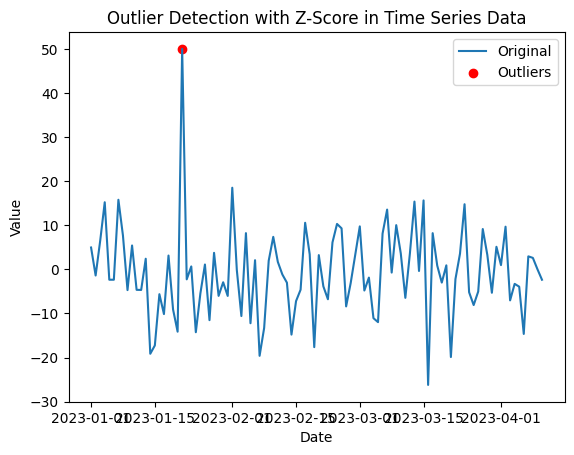

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [11]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

- 빨간 점 : 임계값을 넘어간 이상치로 판단